**Definindo o Problema de Negócio**  
Crie um teste de hipótese para verificar se os voos da Delta Airlines (DL) atrasam mais do que os voos da UA (United Airlines)

**O pacote "nycflights13" é um conjunto de dados frequentemente utilizado para análise de dados e visualização em R, uma linguagem de programação amplamente usada para análise estatística e gráficos. Este pacote contém informações sobre voos na área metropolitana de Nova York, incluindo dados sobre atrasos, companhias aéreas, aeroportos e muito mais.**

In [1]:
library('nycflights13')

Warning message:
"package 'nycflights13' was built under R version 4.2.3"


In [2]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [3]:
dim(flights)

[1] 336776     19

In [4]:
#Filtrando o DF com base na coluna 'carrier' e armazenando em novo objeto que somente conterá as operadoras DL e UA
#filtrando pela coluna arr_delay para conter valores maior que 0, que são efetivamente atrasos
df_voos <- subset(flights, (carrier == 'UA' | carrier == 'DL') & (arr_delay >= 0))

In [5]:
head(df_voos)
dim(df_voos)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00
2013,1,1,611,600,11,945,931,14,UA,303,N532UA,JFK,SFO,366,2586,6,0,2013-01-01 06:00:00
2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00


[1] 40335    19

## Teste de Hipótese:
- HA = Os voos da DL atrasam mais do que os voos da UA.
- H0 = Não há diferença significativa entre os atrasos da DL e UA

**Como não foi especificado se o atrasado se refere a partida ou chegada, consideramos o atraso de chegada por ter mais impacto no dia a dia das pessoas.** 
- arr_delay: O atraso na chegada em minutos. Se for negativo, o voo chegou antes do horário programado.

In [6]:
library('dplyr')

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
pop_data <-select(df_voos, carrier, arr_delay) #Selecionando colunas especificas

In [8]:
head(pop_data) 
dim(pop_data)

carrier,arr_delay
<chr>,<dbl>
UA,11
UA,20
UA,12
UA,7
UA,14
UA,1


[1] 40335     2

In [9]:
#verificando valores ausentes no novo DataFrame
colSums(is.na(pop_data))

carrier arr_delay 
        0         0

In [10]:
#Divindo o dataset em duas amostras de 1000 observações para cada companhia aerea
amostra1 <- pop_data %>%
filter(carrier =='DL') %>% #Seleciona linhas especificas
sample_n(size = 1000,replace = FALSE)%>% #amostragem sem reposição
mutate(Id = 1) #Adicionando uma coluna para identificar a companhia para realização dos testes de hipótese

#A função sample_n do pacote dplyr é usada para amostrar um número específico de observações de um conjunto de dados.
head(amostra1)
dim(amostra1)

carrier,arr_delay,Id
<chr>,<dbl>,<dbl>
DL,291,1
DL,9,1
DL,0,1
DL,0,1
DL,27,1
DL,22,1


[1] 1000    3

In [11]:
#Divindo o dataset em duas amostras de 1000 observações para cada companhia
amostra2 <- pop_data %>%
filter(carrier == 'UA') %>%
sample_n(size = 1000, replace = FALSE) %>%
mutate(Id = 2) 

head(amostra2)
dim(amostra2)

carrier,arr_delay,Id
<chr>,<dbl>,<dbl>
UA,84,2
UA,21,2
UA,8,2
UA,17,2
UA,52,2
UA,85,2


[1] 1000    3

In [12]:
#Resumno estatística  da amostra 1:  DL
summary(amostra1)

   carrier            arr_delay            Id   
 Length:1000        Min.   :  0.00   Min.   :1  
 Class :character   1st Qu.:  6.00   1st Qu.:1  
 Mode  :character   Median : 15.00   Median :1  
                    Mean   : 35.20   Mean   :1  
                    3rd Qu.: 41.25   3rd Qu.:1  
                    Max.   :561.00   Max.   :1  

In [13]:
#Resumno estatística  da amostra 2:  UA
summary(amostra2)

   carrier            arr_delay            Id   
 Length:1000        Min.   :  0.00   Min.   :2  
 Class :character   1st Qu.:  6.00   1st Qu.:2  
 Mode  :character   Median : 17.50   Median :2  
                    Mean   : 35.29   Mean   :2  
                    3rd Qu.: 43.00   3rd Qu.:2  
                    Max.   :383.00   Max.   :2  

### Agora vamos calcular o intervalo de confiança para um nível de confiança de 95% para amostra1 e amostra2 

In [14]:
#Primeiro precisamos extrair a coluna da interesse: 'arr_delay'
arr_amostra1<- amostra1$arr_delay
head(arr_amostra1)

[1] 291   9   0   0  27  22

In [15]:
arr_amostra2<- amostra2$arr_delay
head(arr_amostra2)

[1] 84 21  8 17 52 85

In [16]:
#Criando tabela com z score e nivel de confianca
tabela_confianca <- data.frame(
        Nivel_de_Confianca = c(0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99),
        Valor_Z = c(1.645, 1.695, 1.751, 1.812, 1.881, 1.960, 2.054, 2.170, 2.326, 2.576)
    )
tabela_confianca

Nivel_de_Confianca,Valor_Z
<dbl>,<dbl>
0.90,1.645
0.91,1.695
0.92,1.751
0.93,1.812
0.94,1.881
0.95,1.960
0.96,2.054
0.97,2.170
0.98,2.326


In [17]:
# Função para calcular o intervalo de confiança
intervalo_confian <- function(x, y) {
    
    if (y %in% tabela_confianca$Nivel_de_Confianca) {
        valor_z <- tabela_confianca$Valor_Z[tabela_confianca$Nivel_de_Confianca == y]
        cat('Valor Z:', valor_z, '\n') # É responsável por imprimir uma mensagem no console
        
        # Cálculo
        erro_padrao_dados <- sd(x) / sqrt(length(x))
        lower <- mean(x) - valor_z * erro_padrao_dados
        upper <- mean(x) + valor_z * erro_padrao_dados
        cat('Limite Inferior:', lower, '\n')
        cat('Limite Superior', upper, '\n')
        
        # Atribuir os valores de lower e upper a variáveis globais
        #envir = .GlobalEnv especifica que queremos que essa variável seja global.
        assign('lower', lower, envir = .GlobalEnv)
        assign('upper', upper, envir = .GlobalEnv)
        
    } else {
        cat('Valor Z não encontrado na tabela\n')
    }
}

In [18]:
intervalo_confian(arr_amostra1, 0.95)

Valor Z: 1.96 
Limite Inferior: 31.78903 
Limite Superior 38.61297 


In [19]:
Limite_infe1 <-lower
Limite_supe1 <-upper

In [20]:
intervalo_confian(arr_amostra2,0.95)

Valor Z: 1.96 
Limite Inferior: 32.21849 
Limite Superior 38.36151 


In [21]:
Limite_infe2 <-lower
Limite_supe2 <-upper

In [22]:
# Para criar um gráfico pelo ggplot precisamos criar alguns objetos que definem os dados;
# Armazenando a media em um objeto
media1 <-mean(arr_amostra1)
media2 <-mean(arr_amostra2)

# Criando um data frame com os valores necessários para criação do gráfico e criando a coluna grupo para percorrer os
#dados posteriormente. 
data1 <- data.frame(Media = media1, Lower = Limite_infe1, Upper = Limite_supe1, Grupo = 'Grupo 1')
data2 <- data.frame(Media = media2, Lower = Limite_infe2, Upper = Limite_supe2, Grupo = 'Grupo 2')
data1
data2

Media,Lower,Upper,Grupo
<dbl>,<dbl>,<dbl>,<chr>
35.201,31.78903,38.61297,Grupo 1


Media,Lower,Upper,Grupo
<dbl>,<dbl>,<dbl>,<chr>
35.29,32.21849,38.36151,Grupo 2


In [23]:
library('ggplot2')

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [24]:
# Criar um data frame combinado com os valores de data1 e data2 para gerar dois gráficos lado a lado,
combined_data <- rbind(data1,data2)
combined_data

Media,Lower,Upper,Grupo
<dbl>,<dbl>,<dbl>,<chr>
35.201,31.78903,38.61297,Grupo 1
35.290,32.21849,38.36151,Grupo 2


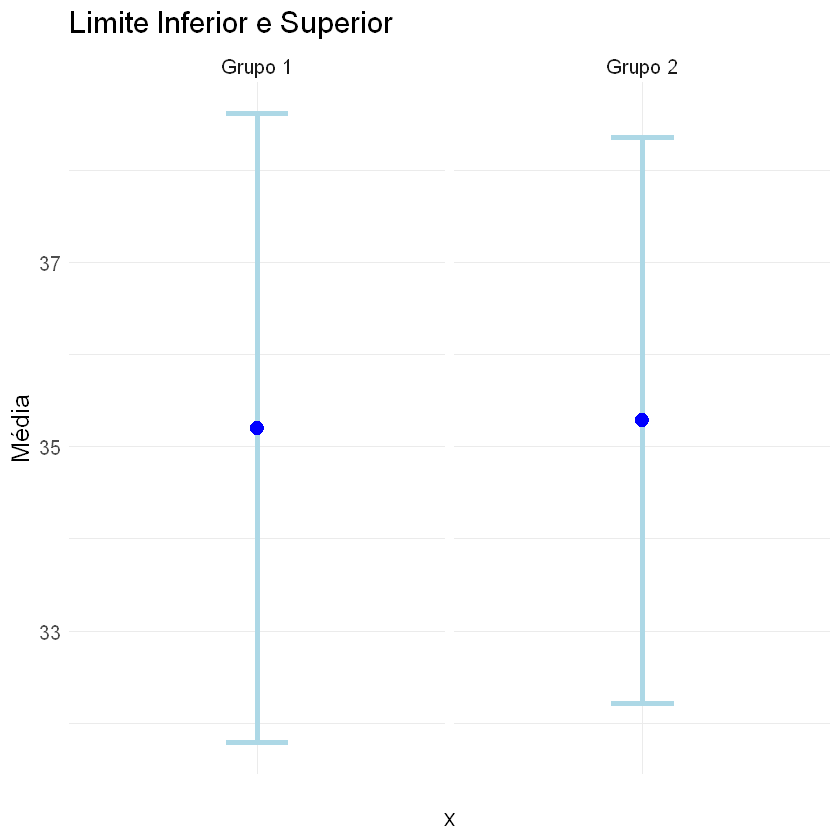

In [25]:
ggplot(combined_data, aes(x = '', y = Media)) +
  geom_linerange(aes(ymin = Lower, ymax = Upper), linewidth = 1.5, color = "lightblue") +
  geom_errorbar(aes(ymin = Lower, ymax = Lower), width = 0.2, linewidth = 1.5, color = "lightblue") +
  geom_errorbar(aes(ymin = Upper, ymax = Upper), width = 0.2, linewidth = 1.5, color = "lightblue") +
  geom_point(size = 3.5, color = "blue") +
  labs(title = "Limite Inferior e Superior", y = "Média") +
  theme_minimal() +
  theme(
    text = element_text(size = 15)
  ) +

#facet_wrap(~ Grupo, ncol = 2) é usado para dividir os gráficos em painéis com base na variável 'grupo'
facet_wrap(~ Grupo, ncol = 2) 

### Testes de Hipóteses

In [26]:
#Combinando os DF para realizar os testes de hipóteses:
amostra_combin <- rbind(amostra1,amostra2)
head(amostra_combin)
dim(amostra_combin)

carrier,arr_delay,Id
<chr>,<dbl>,<dbl>
DL,291,1
DL,9,1
DL,0,1
DL,0,1
DL,27,1
DL,22,1


[1] 2000    3

### HIPÓTESES TESTADAS
- HA = Os voos da DL atrasam mais do que os voos da UA.
- H0 = Não há diferença significativa entre os atrasos da DL e UA


### Podemos usar o Teste t de duas amostras (teste t de Student):
É usado quando desejamos realizar um teste t pareado para comparar as médias de duas amostras.  

**A hipótese nula (H0) para este teste é que não há diferença significativa entre as médias das duas amostras emparelhadas, e a hipótese alternativa (Ha) é que há uma diferença significativa.**

   ### Precisamos validar duas suposições se a amostra segue uma distribuição normal para isto, utilizaremos o teste de Shapiro-Wilk em que:  
    - H0(Hipótese Nula) = Os dados seguem uma distribuição normal.
    - HA (Hipótese Alternativa) = Os dados não seguem uma distribuição normal.
    
   ### E também é necessário verificar  se as médias das amostras têm a mesma variância (ou que não há diferença significativa na variância das médias) para isto utilizaremos o teste F:  
    - H0(Hipótese Nula)= As médias de dados extraídos de uma população normalmente distribuída têm a mesma variância.
    - HA (Hipótese Alternativa)= As médias de dados extraídos de uma população normalmente distribuída não têm a mesma variância.

In [27]:
#Divindo a coluna Id pelas observações 1 e 2:
id_dl <- amostra_combin$Id ==1

In [28]:
# Teste de Shapiro para Id : DL
shapiro.test(amostra_combin$arr_delay[id_dl])


	Shapiro-Wilk normality test

data:  amostra_combin$arr_delay[id_dl]
W = 0.60639, p-value < 2.2e-16


In [29]:
# Teste de Shapiro para Id :UA
shapiro.test(amostra_combin$arr_delay[!id_dl])


	Shapiro-Wilk normality test

data:  amostra_combin$arr_delay[!id_dl]
W = 0.66508, p-value < 2.2e-16


In [30]:
#Aplicando teste F, variável dependente como arr_delay, variável id = independente;
var.test(arr_delay ~ Id, data = amostra_combin)


	F test to compare two variances

data:  arr_delay by Id
F = 1.234, num df = 999, denom df = 999, p-value = 0.0009047
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.089964 1.397002
sample estimates:
ratio of variances 
           1.23397 


### Como ambos os testes apresentaram um valor de p menor que 0,05, isto sugere temos evidência estatística para rejeitar a hipótese nula, neste caso podemos assumir que:
- Teste de Shapiro-Wilk: HA (Hipótese Alternativa) = Os dados não seguem uma distribuição normal.
- Teste F: HA (Hipótese Alternativa)= As médias de dados extraídos de uma população normalmente distribuída não têm a mesma variância.

### Neste caso usaremos o Teste t de duas amostras de Welch:
- Também conhecido como teste t não pareado com variâncias desiguais:

Usamos o teste t de duas amostras de Welch quando temos duas amostras independentes, mas não podemos assumir igualdade das variâncias entre as amostras **(heterocedasticidade)**. Isso significa que as variâncias nas duas amostras são significativamente diferentes.O teste t de duas amostras de Welch é apropriado quando você deseja comparar as médias de duas amostras independentes e as variâncias nas duas amostras são diferentes.

**A hipótese nula (H0) para esse teste é que as duas médias são iguais, e a hipótese alternativa (Ha) é que a média da primeira amostra é maior do que a média da segunda amostra.**

In [31]:
t.test(amostra1$arr_delay,amostra2$arr_delay, alternative = 'greater')


	Welch Two Sample t-test

data:  amostra1$arr_delay and amostra2$arr_delay
t = -0.037997, df = 1976.3, p-value = 0.5152
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.943482       Inf
sample estimates:
mean of x mean of y 
   35.201    35.290 


### Neste caso, falhamos em rejeitar a hipótese nula, pois p-valor é maior que o nível de significância (α =0,05) estabelecido a priori. Isto significa que há uma probabilidade alta de não haver diferença significativa entre os atrasos das duas companhias.  Desta forma, para os nosso dados, não há evidência estatística que a DL atrase mais que a UA.